# Análisis predictivo de series temporales


### Modelos autorregresivos y autocorrelación parcial

In [3]:
library(astsa)

Warning message:
"package 'astsa' was built under R version 3.6.3"

### Ejercicio 1:
Analizar la serie cmort de mortalidad cardiovascular en Los Angeles y ajustar un modelo autorregresivo de orden adecuado a la misma. Predecir la mortalidad cardiovascular del año siguiente. No olvidar primero estimar la tendencia. Si quieren, pueden proponer además una componente estacional.

In [12]:
options(repr.plot.width=8, repr.plot.height=5)

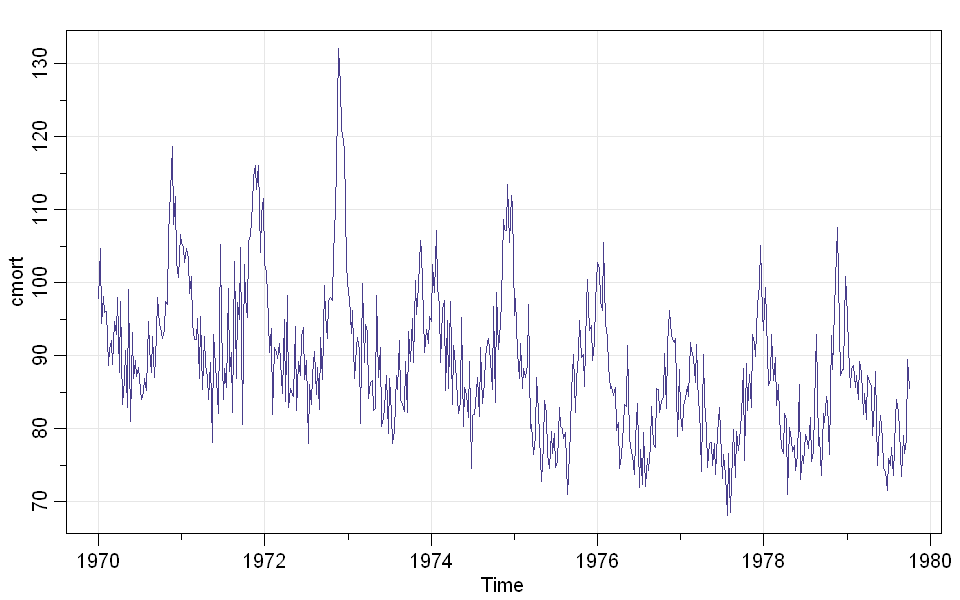

In [14]:
tsplot(cmort, col = "darkslateblue", lwd = 1)


Al parecer nos encontramos con una serie que presenta por un lado una tendencia  a la baja y por el otro, una estacionalidad que perfectamente puede deverse a factores climáticos (temporada de Invierno y Verano)

Procedemos a centrar la serie en su media para poder divisar mejor la tendencia en caso de que presente

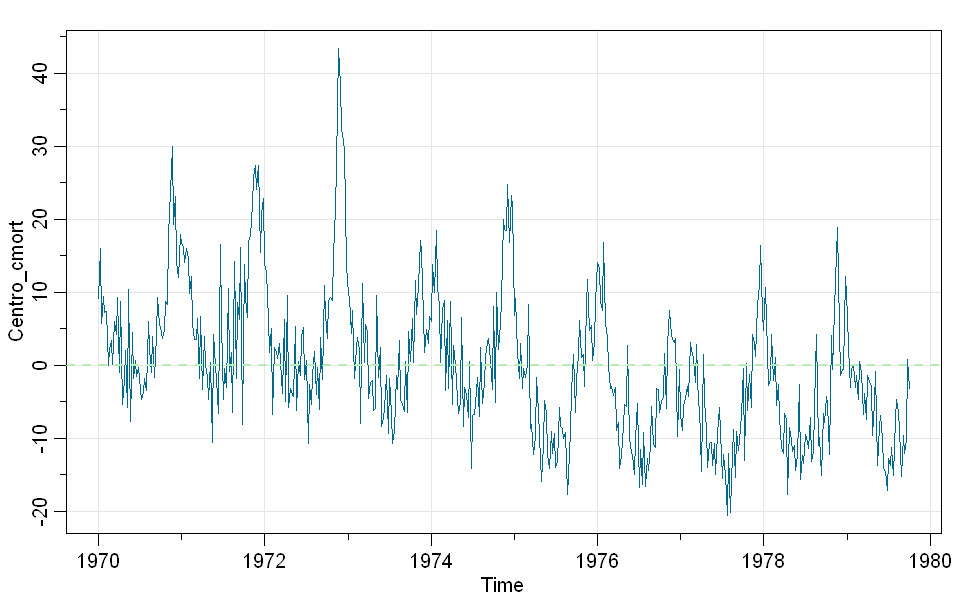

In [19]:
Centro_cmort = cmort - mean(cmort)

tsplot(Centro_cmort, col = "deepskyblue4", lwd = 1)
abline(h = 0, col = "darkseagreen2", lty=2, lwd =2)

confirmada la existencia de una tendencia podríamos probar ajustar primero una tendencia al modelo, analizar residuos  y luego ver cómo trabajar la estacionalidad.

In [22]:
fit_trend <- lm(Centro_cmort ~ time(Centro_cmort) )
summary(fit_trend)


Call:
lm(formula = Centro_cmort ~ time(Centro_cmort))

Residuals:
    Min      1Q  Median      3Q     Max 
-16.445  -6.670  -1.366   5.505  40.107 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3208.9074   276.3132   11.61   <2e-16 ***
time(Centro_cmort)   -1.6249     0.1399  -11.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.893 on 506 degrees of freedom
Multiple R-squared:  0.2104,	Adjusted R-squared:  0.2089 
F-statistic: 134.9 on 1 and 506 DF,  p-value: < 2.2e-16


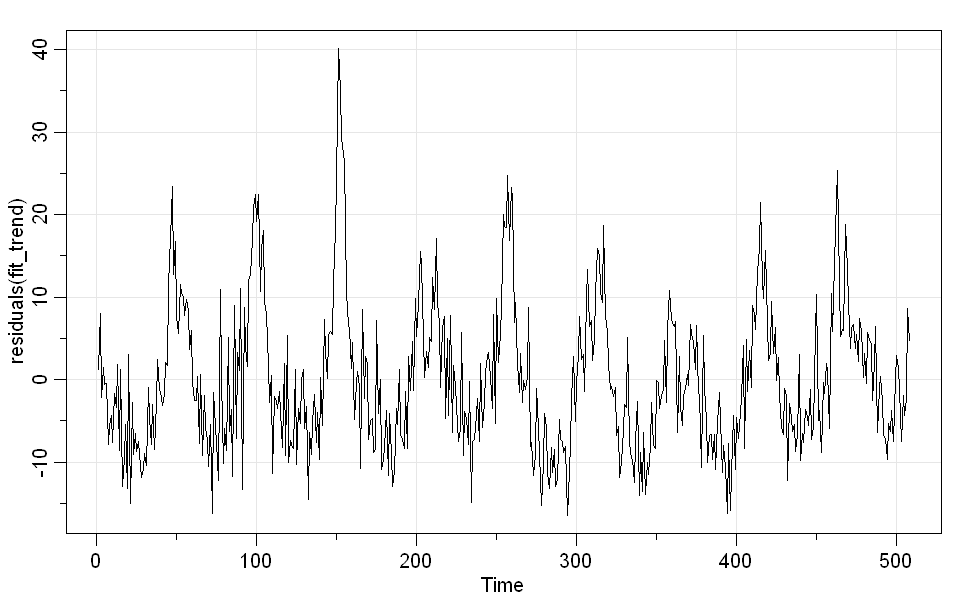

In [23]:
tsplot(residuals(fit_trend))

ACF,0.71,0.71,0.60,0.56,0.48,0.41,0.35,0.27,0.24,0.14,...,-0.41,-0.43,-0.44,-0.41,-0.46,-0.42,-0.43,-0.39,-0.38,-0.34
PACF,0.71,0.42,0.02,0.02,-0.02,-0.06,-0.04,-0.08,0.03,-0.10,...,-0.03,-0.05,-0.09,0.01,-0.13,-0.03,-0.05,0.01,-0.03,-0.02


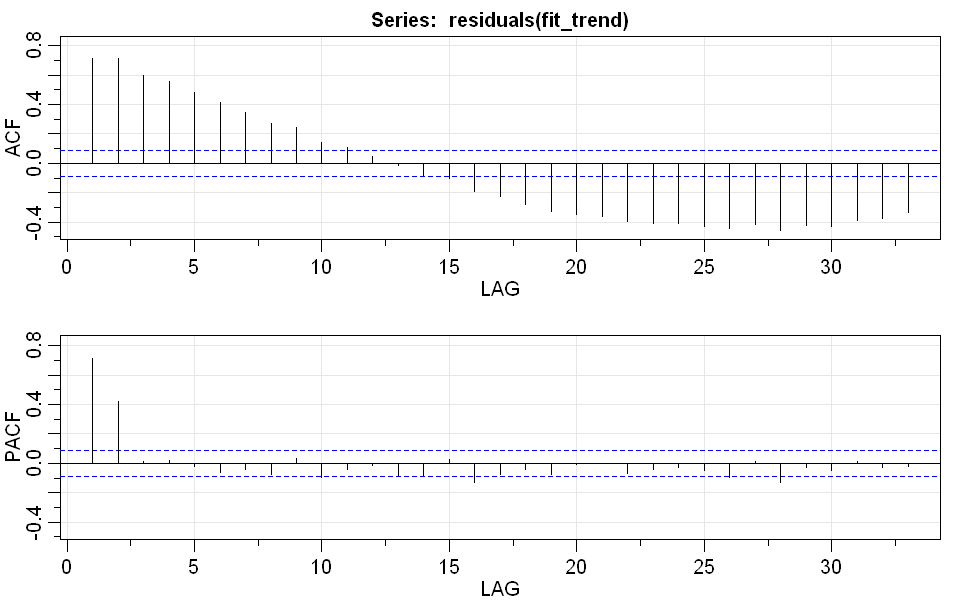

In [24]:
acf2(residuals(fit_trend))

Vemos que los residuos están lejos de ser un ruido blanco. Analizamos el componente estacional

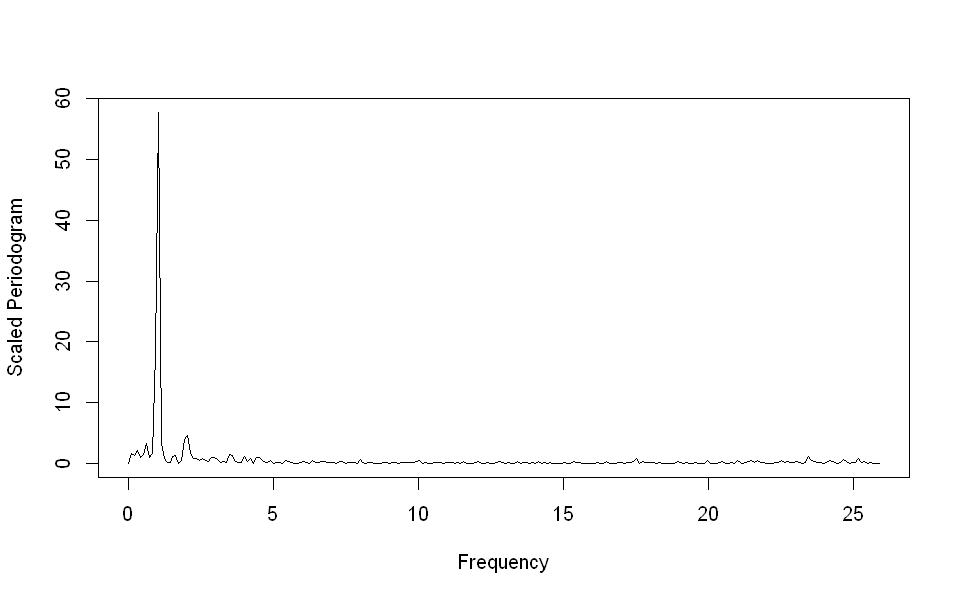

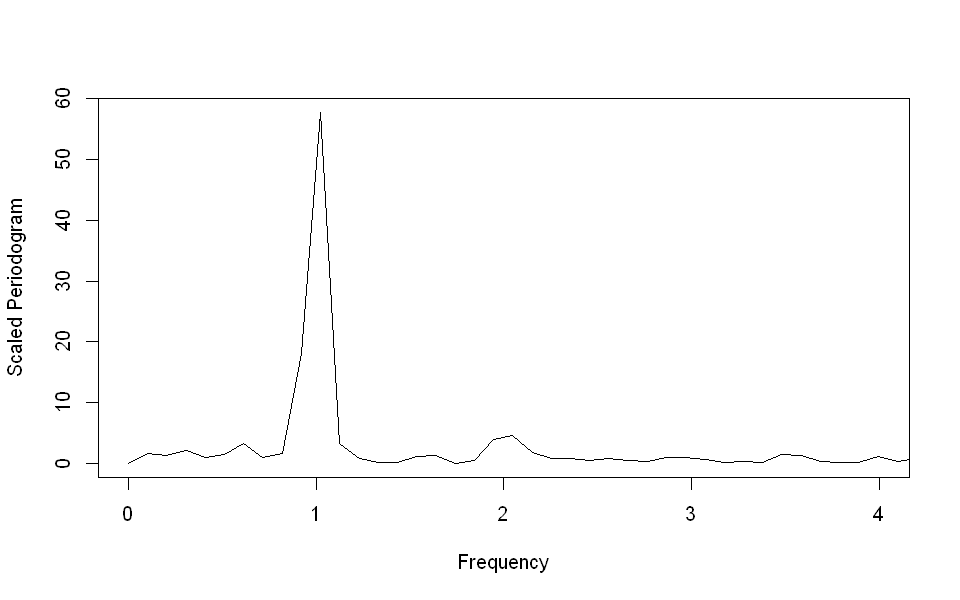

In [29]:
#Periodograma
res_fit_trend = residuals(fit_trend)
n=length(res_fit_trend)
#Periodograma, aca leo la frecuencia de las estacionalidades, se le como la cantidad de periodos cada los que hay estacionalidad. 
I = abs(fft(res_fit_trend))^2/n # the periodogram
P = (4/n)*I[1:(n/2)]
# the scaled periodogram
f = (0:(n/2-1))/n
# frequencies
plot(f*52, P, type="l", xlab="Frequency", ylab="Scaled Periodogram" )#paso a años *52 por tratarse de datos semanales
plot(f*52, P, type="l", xlab="Frequency", ylab="Scaled Periodogram" , xlim = c(0,4)) #Hago zoom en los primeros lags

La interpretación del periodograma nos indica que estaríamos en presencia de una estacionalidad anual. 

In [33]:
est=1 #Estacionalidad Anual

#Ajusto una sinusoide

t = time(Centro_cmort)

fit_est = lm(res_fit_trend ~ 0 + sin(2*pi*t*est) + cos(2*pi*t*est))

summary(fit_est)





Call:
lm(formula = res_fit_trend ~ 0 + sin(2 * pi * t * est) + cos(2 * 
    pi * t * est))

Residuals:
    Min      1Q  Median      3Q     Max 
-16.543  -3.817  -0.565   3.468  31.801 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
sin(2 * pi * t * est)  -3.0326     0.3938  -7.701 7.18e-14 ***
cos(2 * pi * t * est)   8.4105     0.3938  21.357  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.275 on 506 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5001 
F-statistic: 255.1 on 2 and 506 DF,  p-value: < 2.2e-16


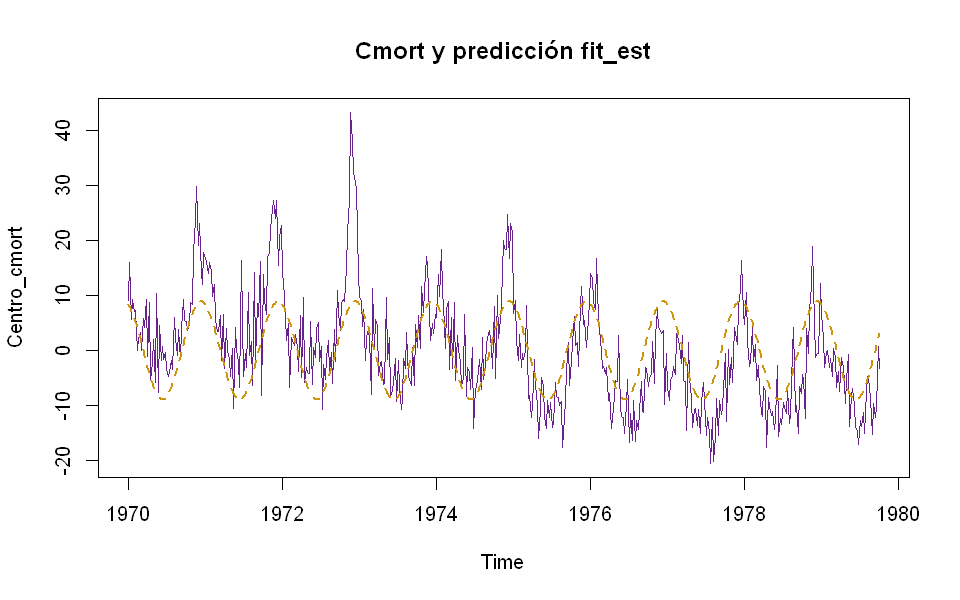

In [39]:
Pred_fit_est = ts(predict(fit_est), start=1970, freq=52)

plot(Centro_cmort, main = "Cmort y predicción fit_est", col = "darkorchid4", lwd = 1)
lines(Pred_fit_est, col = "darkgoldenrod3", lty = 2, lwd = 2)

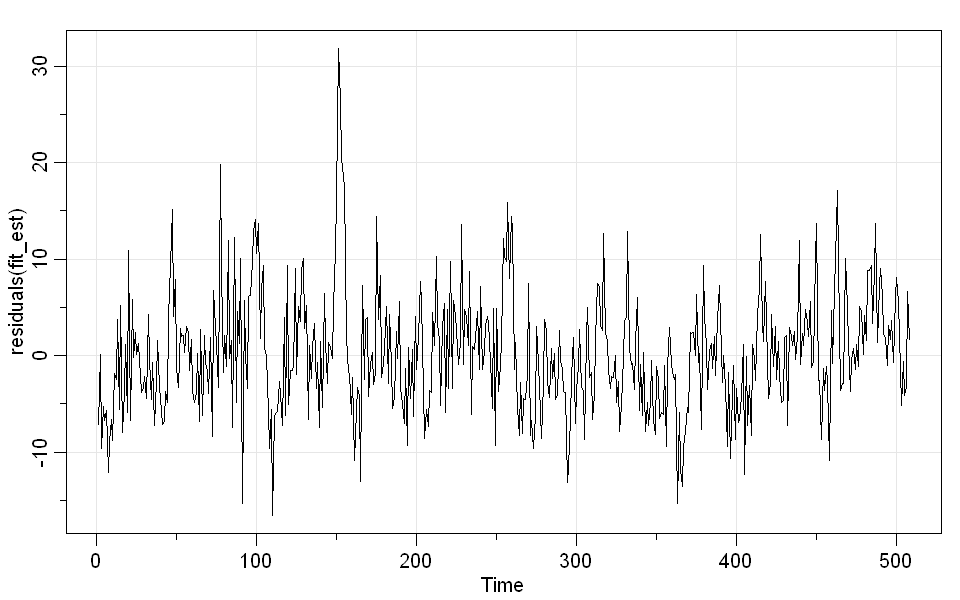

In [43]:
tsplot(residuals(fit_est))

ACF,0.43,0.46,0.26,0.23,0.13,0.07,0.02,-0.05,0.00,-0.09,...,0.15,0.14,0.12,0.17,0.06,0.10,0.03,0.05,0.02,0.01
PACF,0.43,0.34,-0.02,0.00,-0.02,-0.06,-0.03,-0.06,0.06,-0.06,...,0.05,0.03,-0.02,0.08,-0.08,0.01,-0.01,0.04,0.00,-0.01


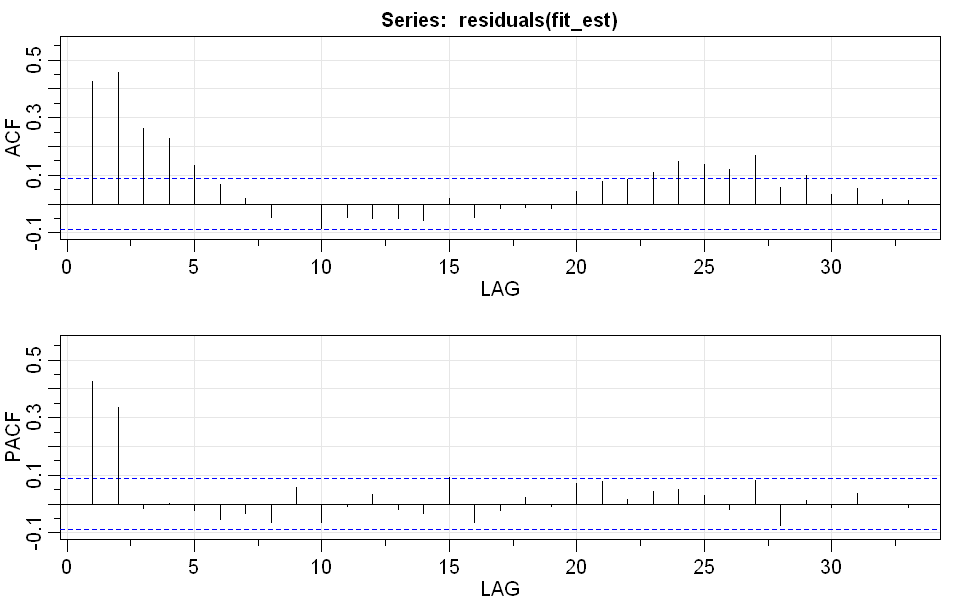

In [44]:
acf2(residuals(fit_est))

Del análisis de el ACF y PACF vemos que deberíamos ajustar sobre los residuos un modelo AR(2)

In [47]:
#install.packages("forecast")
library(forecast)

#install.packages("lmtest")
library(lmtest)

Warning message:
"package 'forecast' is in use and will not be installed"

package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\pblan\anaconda3\envs\Pablo\Lib\R\library\00LOCK\lmtest\libs\x64\lmtest.dll  a C:\Users\pblan\anaconda3\envs\Pablo\Lib\R\library\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\pblan\AppData\Local\Temp\RtmpugbhiI\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [48]:
res_fit_est = residuals(fit_est)

Ar2_res_fit_est = arima(res_fit_est, order=c(2,0,0))

coeftest(Ar2_res_fit_est)



z test of coefficients:

          Estimate Std. Error z value  Pr(>|z|)    
ar1       0.282970   0.041735  6.7801 1.201e-11 ***
ar2       0.336870   0.041765  8.0658 7.278e-16 ***
intercept 0.167020   0.618768  0.2699    0.7872    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


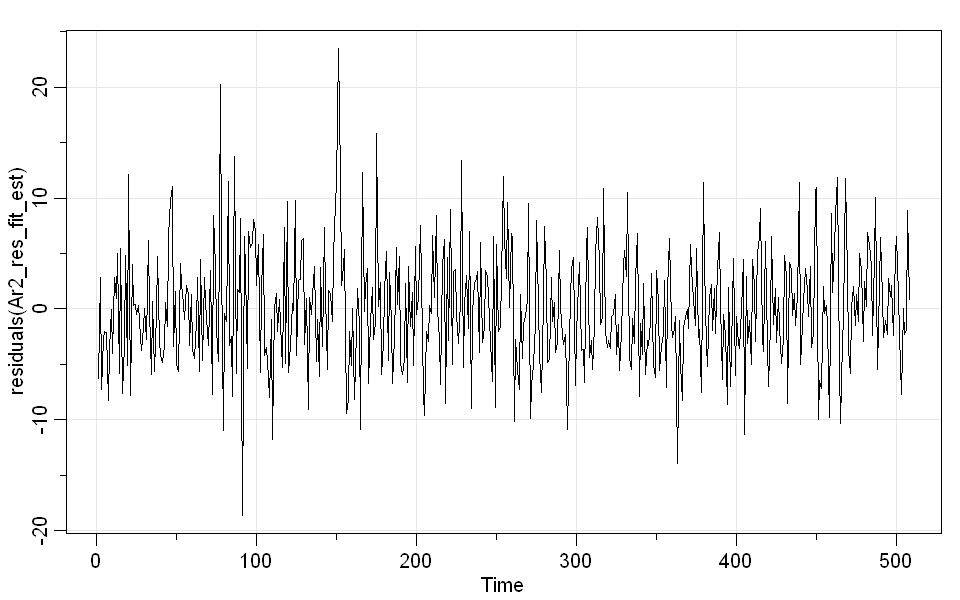

In [50]:
tsplot(residuals(Ar2_res_fit_est))

ACF,0.01,0.01,-0.01,0.03,0.01,-0.01,-0.04,-0.07,0.05,-0.08,...,0.08,0.03,0.02,0.12,-0.05,0.03,-0.02,0.03,0.02,0.03
PACF,0.01,0.01,-0.01,0.03,0.01,-0.01,-0.04,-0.07,0.05,-0.08,...,0.06,0.04,0.01,0.11,-0.04,0.03,-0.03,0.05,0.02,0.03


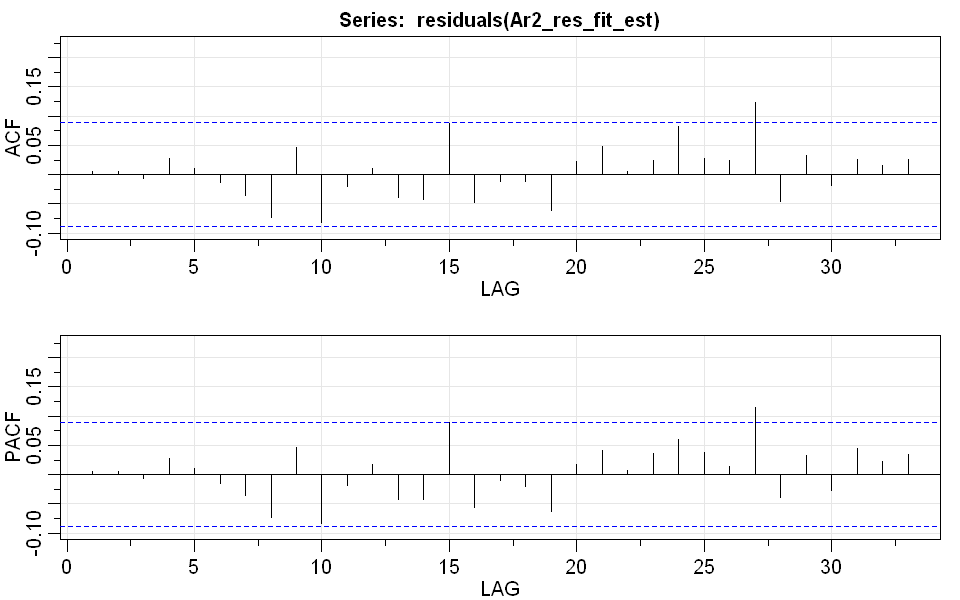

In [52]:
acf2(residuals(Ar2_res_fit_est))

Parecería que finalmente los residuos se comportan como ruido blanco

También podemos probar el AR2 directamente sobre la serie cmort centrada

In [53]:
Ar2_cmort = arima(Centro_cmort, order=c(2,0,0))

coeftest(Ar2_cmort)




z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1       0.430063   0.039672 10.8404   <2e-16 ***
ar2       0.442411   0.039769 11.1245   <2e-16 ***
intercept 0.154958   1.940724  0.0798   0.9364    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


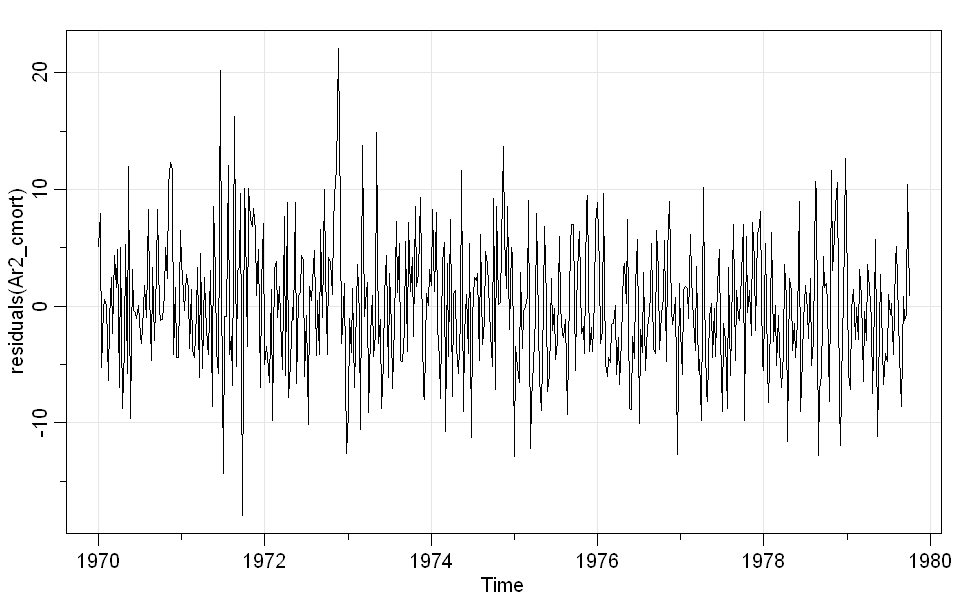

In [54]:
tsplot(residuals(Ar2_cmort))

ACF,-0.01,-0.03,0,0.04,0.04,0.02,0.00,-0.03,0.09,-0.04,...,0.00,-0.02,0.01,0.05,0.08,0.00,0.01,0.05,0.03,0.08
PACF,-0.01,-0.03,0,0.04,0.04,0.02,0.01,-0.03,0.09,-0.05,...,0.02,0.03,0.01,0.02,0.07,-0.05,0.02,-0.01,-0.02,-0.01


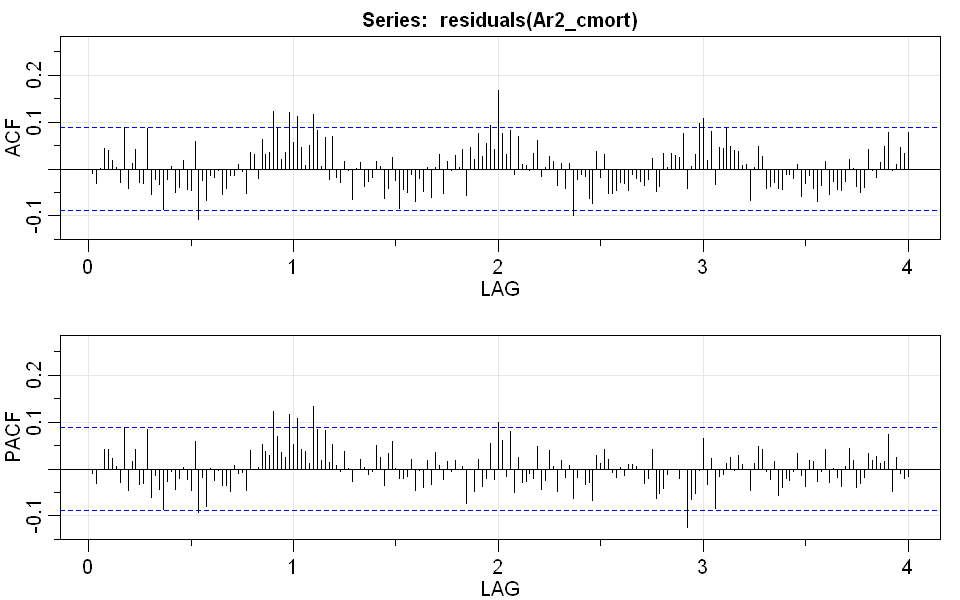

In [55]:
acf2(residuals(Ar2_cmort))

También se muestran como ruido blanco, por lo que podemos directamente probar la predicción con el modelo AR2

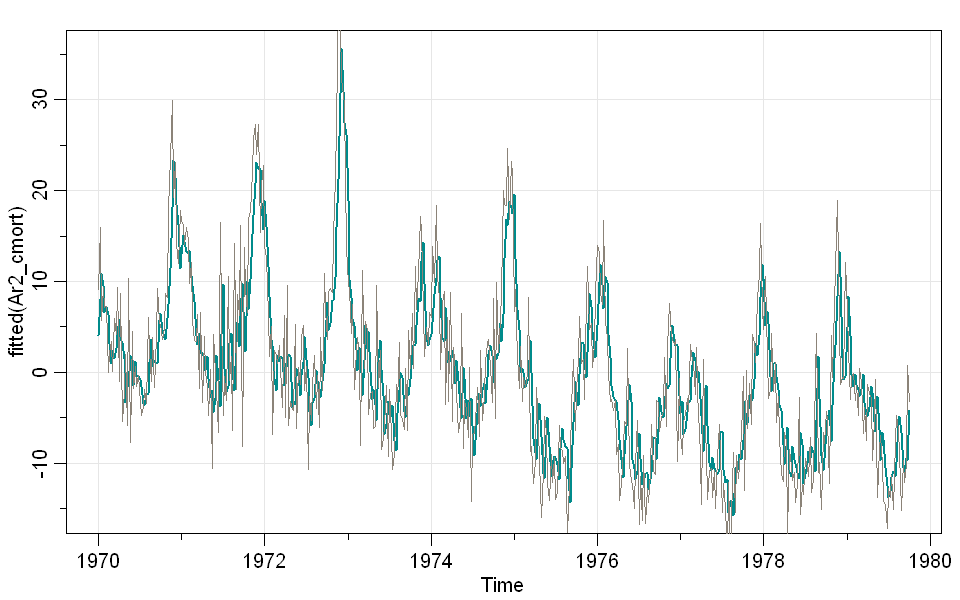

In [61]:
tsplot(fitted(Ar2_cmort), col = "cyan4", lwd = 2)
lines(Centro_cmort, col = "antiquewhite4")

Por ser un modelo más "simple" definimos predecir con el modelo de AR2

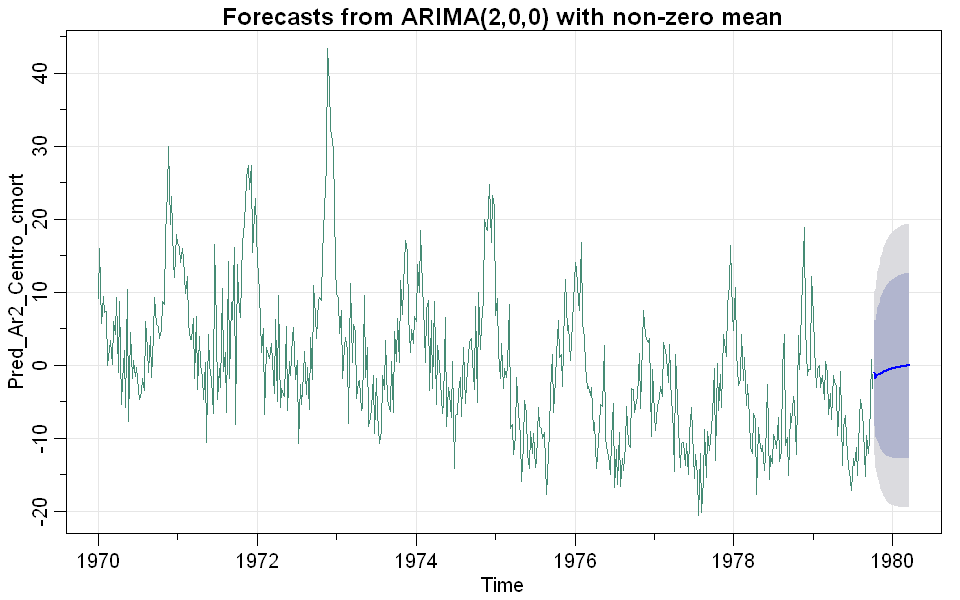

In [64]:


Pred_Ar2_Centro_cmort = forecast(Ar2_cmort, h= 24)

tsplot(Pred_Ar2_Centro_cmort, col = "aquamarine4")

## Ejercicio 2

### Diferencias para estacionariedad

Considere la serie `gnp` de producto bruto interno de EEUU incluida en la biblioteca `astsa`. La serie contiene el PBI de EEUU trimestral de 1947 a 2002 ($n=223$), en billones de dólares de 1996, ajustado estacionalmente.

 1. Analice el comportamiento de la serie. ¿Es estacionaria?
 2. Considere la transformación log(gnp). Proponga un ajuste lineal para la tendencia.
 3. Ajuste un modelo autorregresivo a los residuos de la serie. Analice el error cometido.
 4. Se propone ahora como forma de estacionarizar la serie tomar las diferencias de valores consecutivos usando el comando  `diff`. Notar que esta transformación deja el crecimiento relativo de la serie.
 5. Ajuste nuevamente un modelo autorregresivo a los residuos (no olvide la media) y analice el error.
 6. Repita lo anterior usando las primeras 200 observaciones, y propóngase estimar las restantes 23. ¿Cuál de los dos modelos predice mejor?

#### 1 Analice el comportamiento de la serie. ¿Es estacionaria?

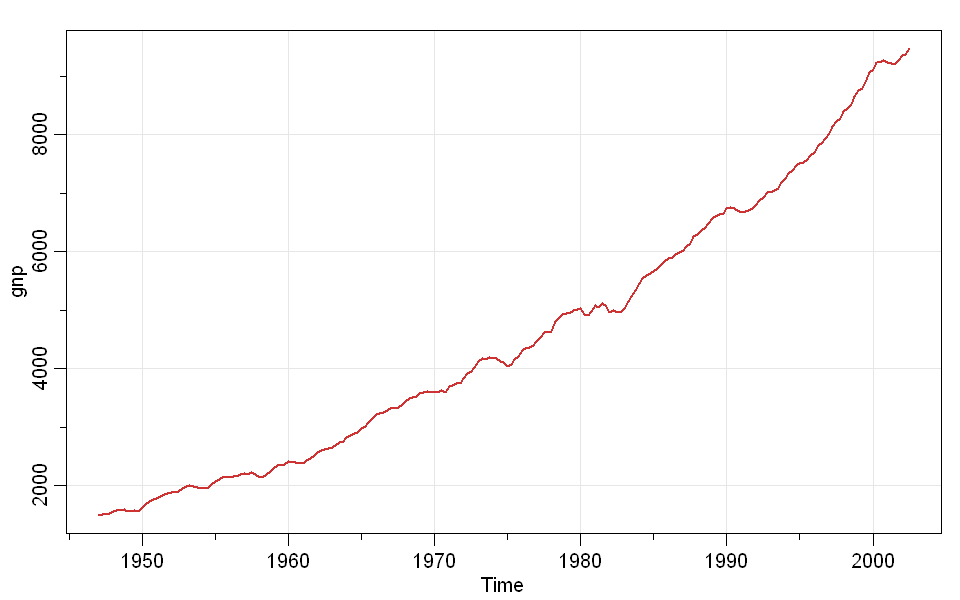

In [67]:
tsplot(gnp, col = "brown3", lwd = 2)

La serie tiene un claro componente de tendencia, creciente. 

#### 2 Considere la transformación log(gnp). Proponga un ajuste lineal para la tendencia

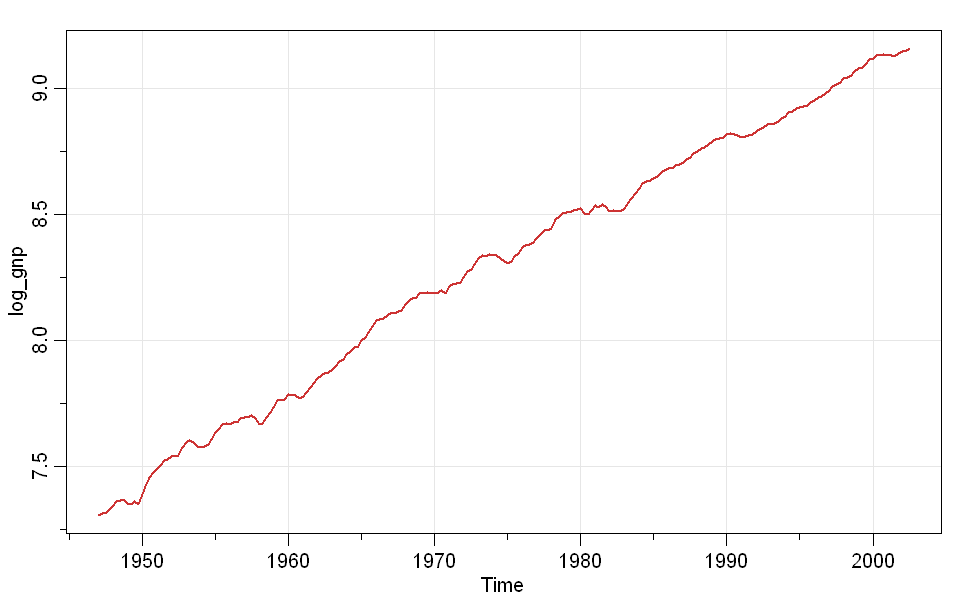

In [68]:
log_gnp = log(gnp)
tsplot(log_gnp, col = "brown3", lwd = 2)

In [69]:
t = time(gnp)

fit_log_gnp = lm(log_gnp ~ t)

summary(fit_log_gnp)


Call:
lm(formula = log_gnp ~ t)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113325 -0.034293 -0.002662  0.028396  0.093294 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.726e+01  3.609e-01  -158.7   <2e-16 ***
t            3.320e-02  1.828e-04   181.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04392 on 221 degrees of freedom
Multiple R-squared:  0.9933,	Adjusted R-squared:  0.9933 
F-statistic: 3.299e+04 on 1 and 221 DF,  p-value: < 2.2e-16


#### 3 Ajuste un modelo autorregresivo a los residuos de la serie. Analice el error cometido.

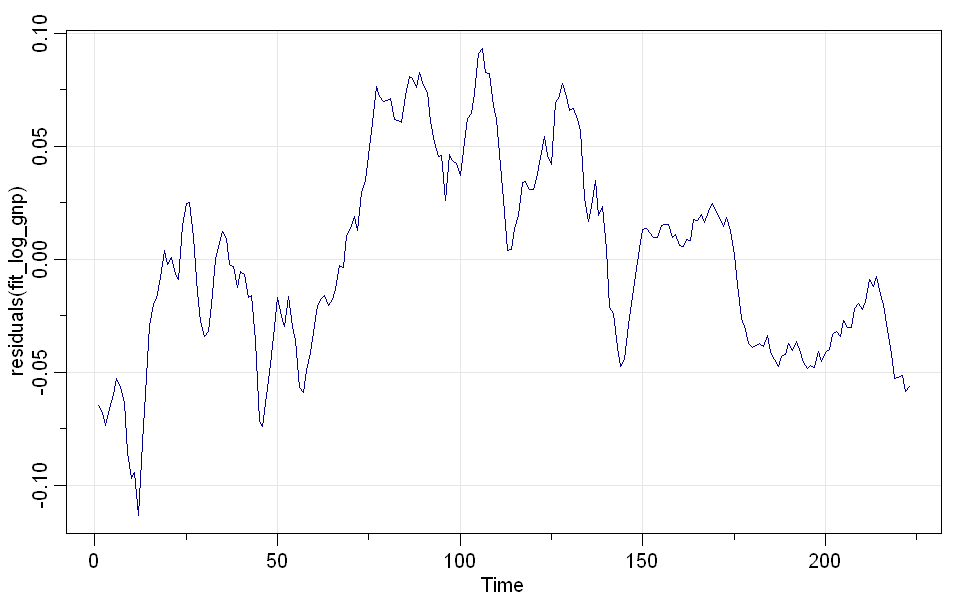

In [74]:
res_fit_log_gnp = residuals(fit_log_gnp)

tsplot(residuals(fit_log_gnp), col = "blue4")

ACF,0.96,0.91,0.84,0.78,0.72,0.68,0.64,0.61,0.57,0.54,...,0.38,0.37,0.36,0.34,0.32,0.30,0.28,0.26,0.25,0.25
PACF,0.96,-0.30,-0.11,0.05,0.06,0.09,-0.02,0.01,-0.05,-0.05,...,0.01,-0.12,0.04,0.00,-0.03,-0.01,0.04,-0.02,0.06,-0.01


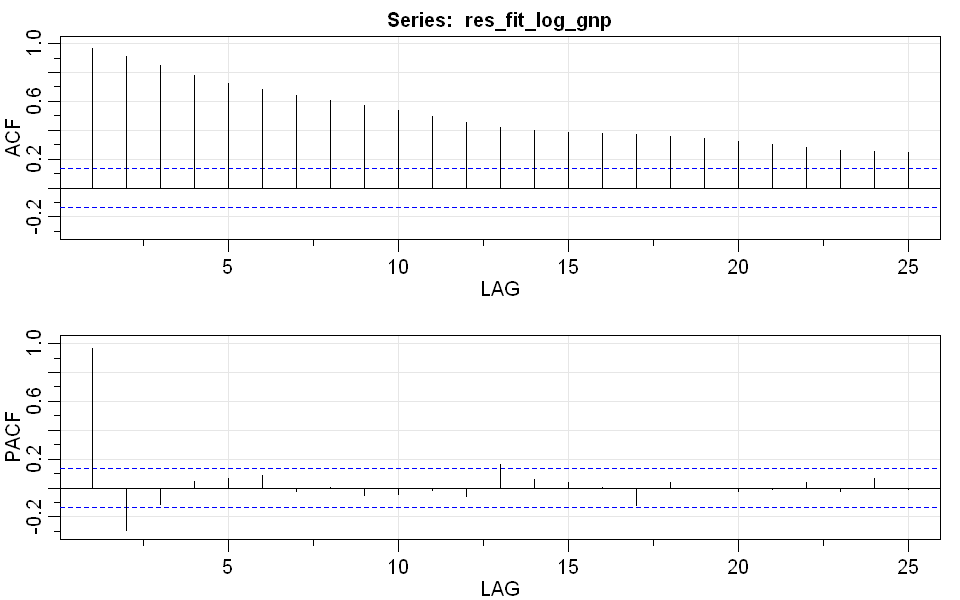

In [73]:
acf2(res_fit_log_gnp)

Ajustamos un modelo AR(2)


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        1.3308415  0.0620476 21.4487 < 2.2e-16 ***
ar2       -0.3657310  0.0625699 -5.8452 5.061e-09 ***
intercept -0.0077856  0.0170315 -0.4571    0.6476    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


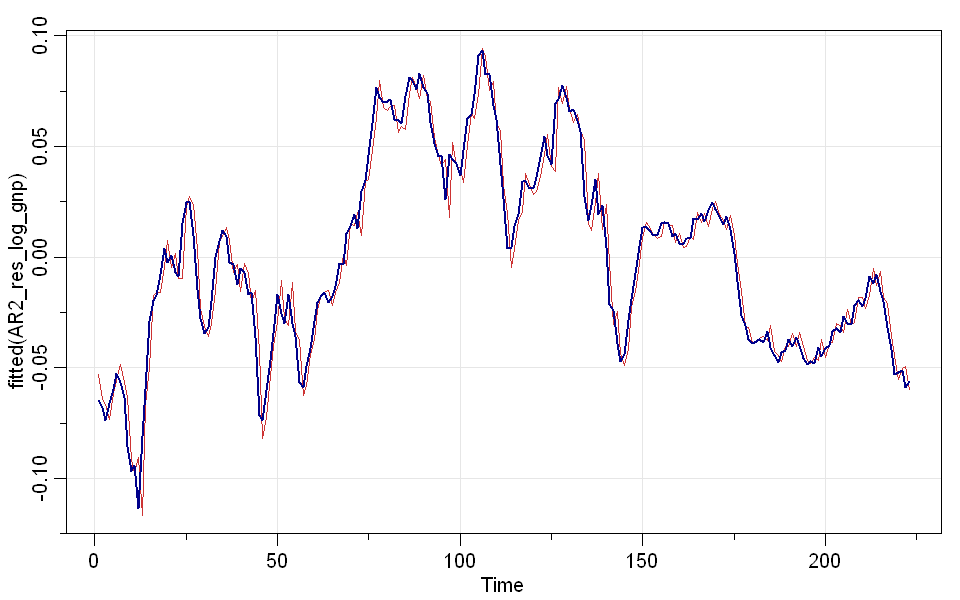

In [77]:
AR2_res_log_gnp = Arima(res_fit_log_gnp, order = c(2,0,0))

coeftest(AR2_res_log_gnp)

tsplot(fitted(AR2_res_log_gnp), col = "brown3")
lines(res_fit_log_gnp, col = "blue4", lwd = 2)

ACF,-0.04,0.12,-0.02,-0.05,-0.11,0,-0.03,-0.01,0.06,0.04,...,0.09,0.02,0.09,0.02,0.10,-0.10,0.03,-0.09,-0.01,0.04
PACF,-0.04,0.12,-0.01,-0.07,-0.11,0,-0.01,-0.02,0.05,0.04,...,0.10,0.03,0.05,0.00,0.06,-0.08,0.02,-0.02,0.00,0.05


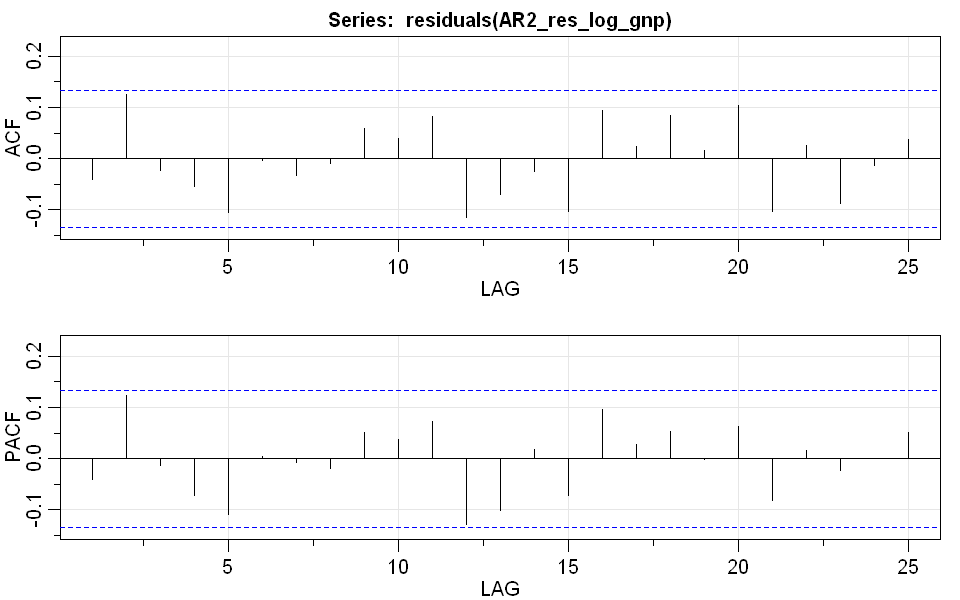

In [78]:
acf2(residuals(AR2_res_log_gnp))

Los residuos se comportan como ruido blanco

#### 4. Se propone ahora como forma de estacionarizar la serie tomar las diferencias de valores consecutivos usando el comando diff. Notar que esta transformación deja el crecimiento relativo de la serie.

In [81]:
diff_log_gnp = diff(log_gnp)



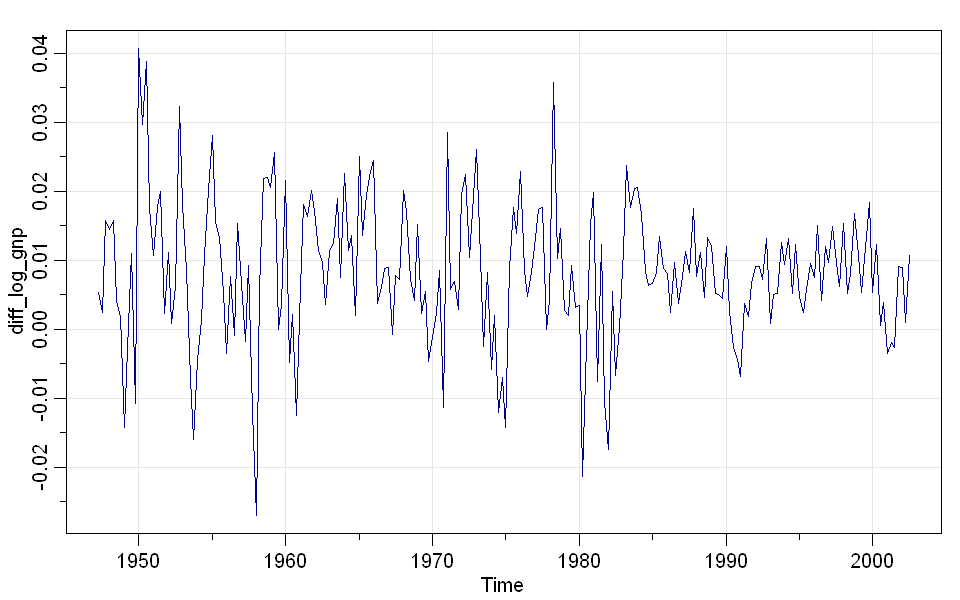

In [86]:
tsplot(diff_log_gnp, col = "blue4")

ACF,0.35,0.19,-0.01,-0.12,-0.17,-0.11,-0.09,-0.04,0.04,0.05,...,0.05,0.07,0.10,0.06,0.07,-0.09,-0.05,-0.10,-0.05,0.00
PACF,0.35,0.08,-0.11,-0.12,-0.09,0.01,-0.03,-0.02,0.05,0.01,...,0.10,0.00,0.02,-0.04,0.01,-0.11,0.03,-0.03,0.00,0.01


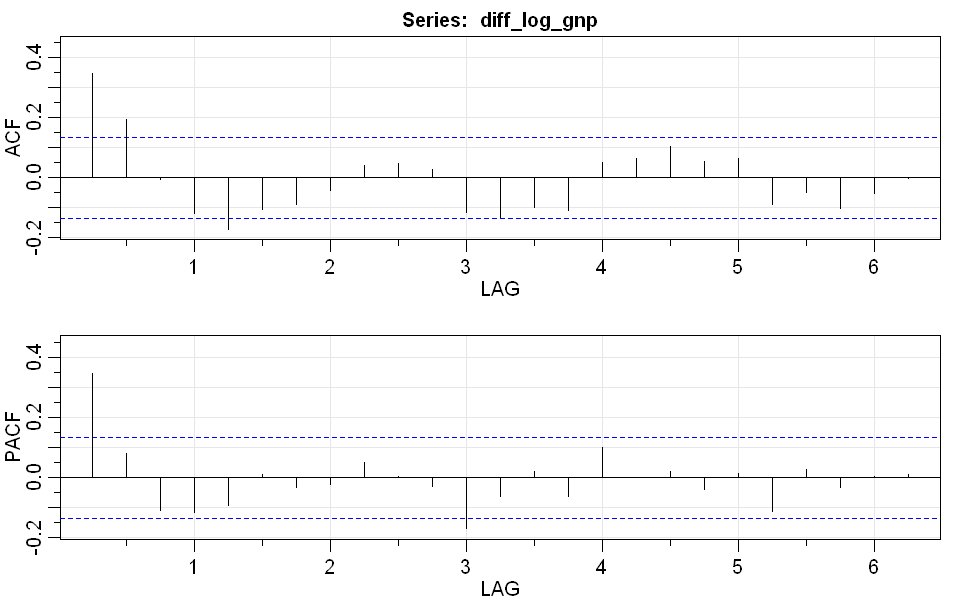

In [87]:
acf2(diff_log_gnp)

Aún con algunos lags fuera del intervalo de confianza, podríamos decir que un modelo AR(1) podría ajustar bien a la serie


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ma1       0.30280854 0.06544045  4.6272 3.706e-06 ***
ma2       0.20351890 0.06441774  3.1594  0.001581 ** 
intercept 0.00832671 0.00095514  8.7178 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


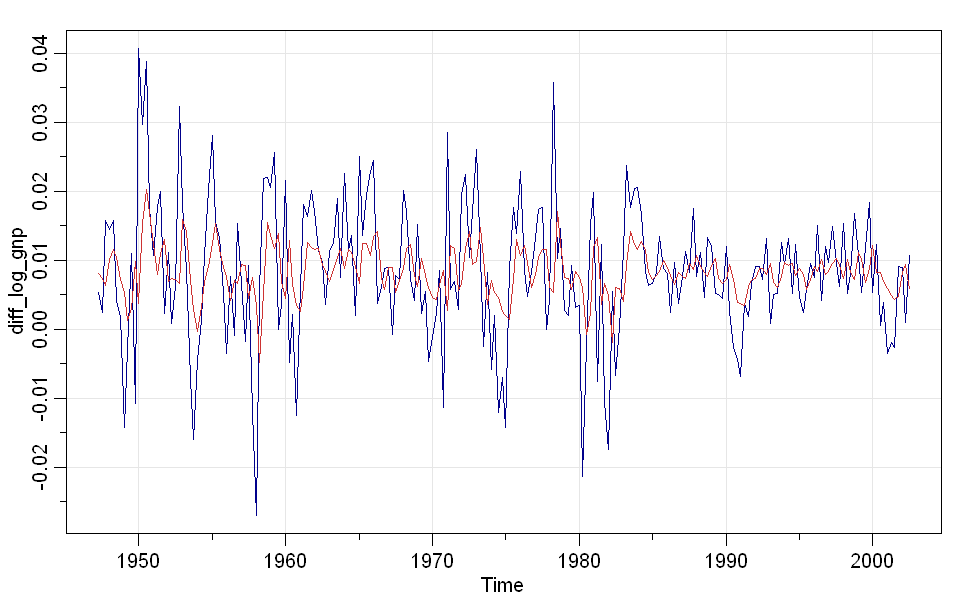

In [95]:
AR1_diff_log_gnp = Arima(diff_log_gnp, order = c(1,0,0))

coeftest(AR1_diff_log_gnp)


tsplot(diff_log_gnp, col = "blue4", lwd = 1)
lines(fitted(AR1_diff_log_gnp), col = "brown3")

El ajuste no parece ser bueno. Quizás sea necesario trabajar con modelos ARIMA directamente y setear la cantidad de diferencias necesarias desde un principio



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.466711   0.065128  7.1661 7.718e-13 ***
ar2 0.231774   0.065092  3.5607 0.0003699 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


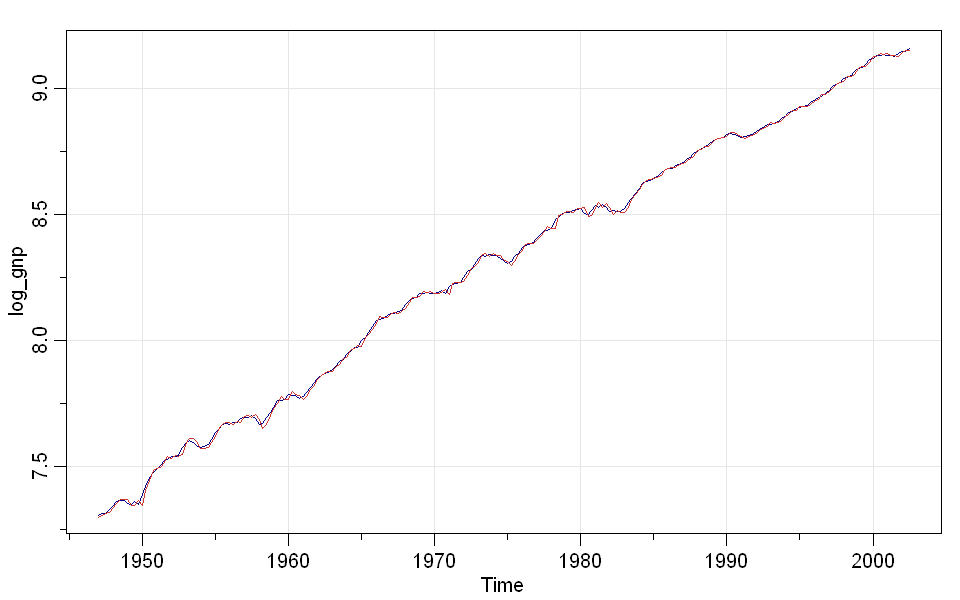

In [100]:
ARIMA_log_gnp = Arima(log_gnp, order = c(2,1,0))

coeftest(ARIMA_log_gnp)


tsplot(log_gnp, col = "blue4", lwd = 1)
lines(fitted(ARIMA_log_gnp), col = "brown3")

### :D 